
# Import Packages and Boston Data Set

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
type(boston)

sklearn.utils.Bunch

# Exploratory Data Analysis and Type Conversion 

In [ ]:
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()
type(df_boston)

pandas.core.frame.DataFrame

In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df_boston.shape

(506, 14)

In [ ]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# check for null values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

# Feature Selection

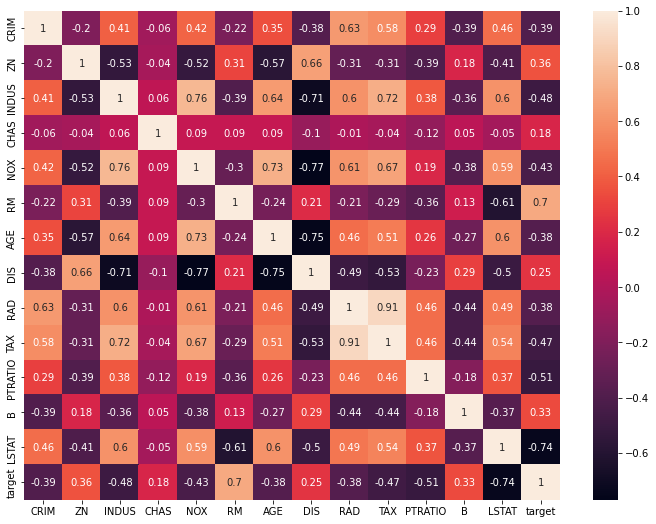

In [ ]:
plt.figure(figsize=(12, 9))
correlation_matrix = df_boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#Reducing the data to 10 features
df_boston = df_boston.drop("ZN", axis='columns')
df_boston = df_boston.drop("DIS", axis='columns') #correlated with many other variables
df_boston = df_boston.drop("B", axis='columns')
df_boston

,CRIM,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,2.31,0.0,0.538,6.575,65.2,1.0,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.0,0.469,6.421,78.9,2.0,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.0,0.469,7.185,61.1,2.0,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.0,0.458,6.998,45.8,3.0,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.0,0.458,7.147,54.2,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.0,0.573,6.593,69.1,1.0,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.0,0.573,6.120,76.7,1.0,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.0,0.573,6.976,91.0,1.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.0,0.573,6.794,89.3,1.0,273.0,21.0,6.48,22.0


# **Regression Analysis**

In [ ]:
# plot and see what's the data look like
y_target = df_boston['target']
features = df_boston.drop("target", axis='columns')

In [ ]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(features, y_target, test_size=0.2, random_state=42)
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ -0.10501516,   0.11391159,   3.17213469, -10.01179179,
         4.57632956,   0.03016678,   0.23782121,  -0.01126784,
        -0.9493846 ,  -0.55154686])

In [ ]:
reg.predict(x_test)

array([27.23805341, 33.65910582, 14.18859883, 24.20505075, 18.36139995,
       23.29241656, 18.05505635, 12.75395005, 22.36641732, 18.98407324,
       24.81074265, 22.40831773, -4.46818837, 22.25052081, 19.9958063 ,
       24.88889343, 20.30225518,  3.92040044, 38.48420793, 17.13752062,
       24.97138162, 27.17865819, 12.38098075, 22.64861234, 17.74820797,
       14.98883393, 21.8804763 , 19.14442372, 23.04953063, 17.7655059 ,
       20.3871518 , 25.13417994, 24.20318002, 17.69782141, 16.2253043 ,
       19.25095285, 32.34367164, 20.6546607 , 23.97355511, 23.85550325,
       12.10093404, 29.40860075, 39.63424822, 18.07882433, 25.40878572,
       15.86750523, 14.69509318, 25.11821734, 19.48111662, 29.44817138,
       24.45864416, 33.91465213, 16.40115184, 24.61523105, 37.42570036,
       22.3665259 , 18.29603756, 29.69656674, 24.64339149, 16.61749227,
       25.93559999, 31.81850768, 28.97937984, 15.52210609, 26.06399723,
       17.23139122, 19.2709707 , 25.02201282, 27.88971685, 15.85

In [ ]:
score = reg.score(x_test, y_test)
score

0.6541396273798452

#**Decision Tree Analysis**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(x_train, y_train)

In [ ]:
DT_reg

DecisionTreeRegressor(max_depth=5)

In [ ]:
print(DT_reg.score(x_test,y_test))

0.7843112882656115


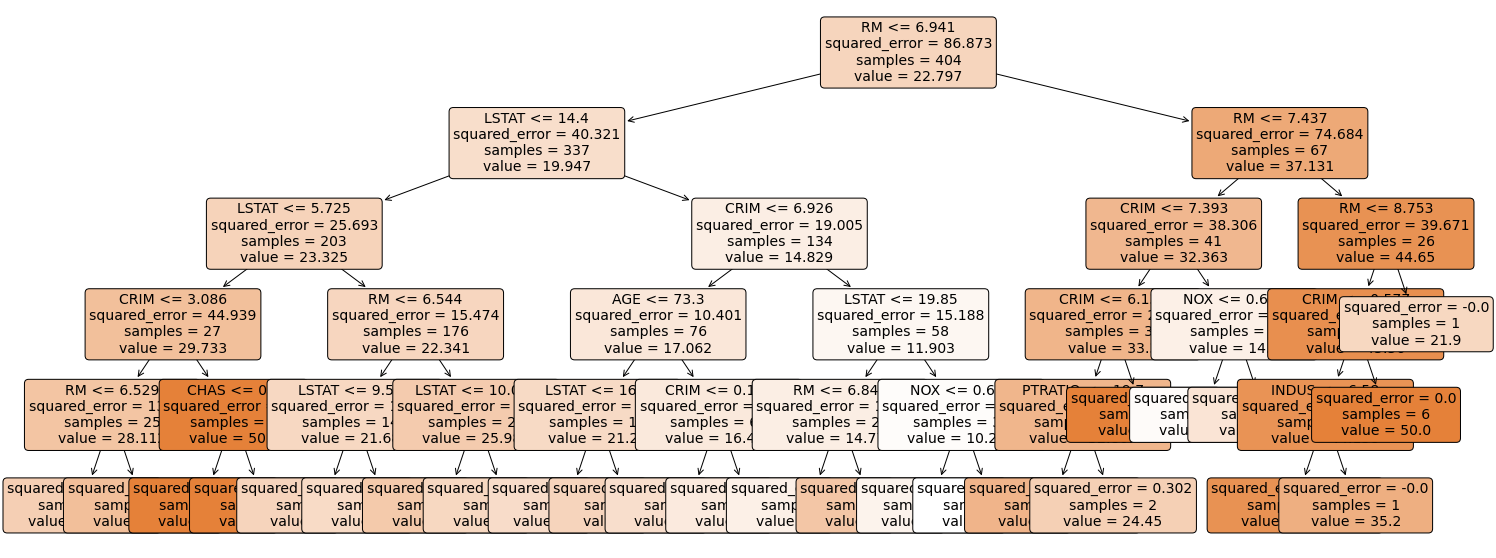

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=x_test.columns, 
              class_names=y_test, 
              filled=True, 
              rounded=True, 
              fontsize=14)